In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from ipywidgets import interactive

In [7]:
def expand_viz(plot, height=500):
    output = interactive_plot.children[-1]
    output.layout.height = f'{height}px'
    interactive_plot
    return interactive_plot

## 1. Binary perceptron I

Let's consider perceptron $F$:

$$
    F(x, y, z) = h(w_1 x + w_2 y + w_3 z)
$$

with

$$
    h(x) = 1~\mathrm{if}~x > 1~\mathrm{else}~0
$$

In [8]:
def perceptron_2d(w1, w2, x, y):
    a = w1 * x + w2 * y
    a = np.where(a > 1, 1.0, 0.0)
    return a

In [11]:
def plot_perceptron_2d(w1=0.1, w2=0.1):
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-0.1, 1.1)
    xx, yy = np.meshgrid(np.linspace(-0.1, 1.1, 50), -np.linspace(-1.1, 0.1, 50))
    a = perceptron_2d(w1, w2, xx, yy)
    pl = ax.imshow(a, alpha=0.5, interpolation="none", origin="lower", extent=(-0.1, 1.1, 1.1, -0.1),  cmap="coolwarm")
    x, y = np.meshgrid([0, 1], [1, 0])
    a = perceptron_2d(w1, w2, x, y)
    ax.scatter(x.ravel(), y.ravel(), c=a.ravel(), cmap="RdYlGn", s=100)
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    
interactive_plot = interactive(plot_perceptron_2d, w1=(-5.0, 5.0, 0.1), w2=(-5.0, 5.0, 0.1))
expand_viz(interactive_plot)

interactive(children=(FloatSlider(value=0.1, description='w1', max=5.0, min=-5.0), FloatSlider(value=0.1, desc…

In [10]:
def perceptron_3d(w1, w2, w3, x, y, z):
    a = w1 * x + w2 * y + w3 * z
    a = np.where(a > 1, 1.0, 0.0)
    return a

In [33]:
def plot_perceptron_3d(w1=0.1, w2=0.1, w3=0.1):
    # w1x + w2y + w3z - 1 = 0
    fig = plt.figure()
    ax = fig.add_subplot(projection="3d")
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-0.1, 1.1)
    ax.set_zlim(-0.1, 1.1)
    x, y, z = np.meshgrid([0, 1], [1, 0], [1, 0])
    a = perceptron_3d(w1, w2, w3, x, y, z)
    ax.scatter(x.ravel(), y.ravel(), z.ravel(), c=a.ravel(), cmap="RdYlGn", s=100)
    xx, yy = np.meshgrid([0, 1], [1, 0])
    zz = (-(w1 * xx + w2 * yy) + 1) / w3
    pl = ax.plot_surface(xx, yy, zz, alpha=0.5)
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    ax.set_zlabel("$z$")

    plt.tight_layout()

interactive_plot = interactive(plot_perceptron_3d, w1=(-5.0, 5.0, 0.1), w2=(-5.0, 5.0, 0.1), w3=(-5.0, 5.0, 0.1))
expand_viz(interactive_plot)

interactive(children=(FloatSlider(value=0.1, description='w1', max=5.0, min=-5.0), FloatSlider(value=0.1, desc…

## 2. Binary perceptron II

In [94]:
def perceptron_2layers(w1, w2, w3, w4, w5, w6, x, y):
    l1 = np.array([[w3, w4], [w1, w2]])
    l2 = np.array([w5, w6])
    
    h = np.dot(l1, np.array([x, y]))
    h = np.where(h > 1, 1.0, 0.0)
    a = np.dot(l2, h)
    a = np.where(a > 1, 1.0, 0.0)
    return a

In [97]:
def plot_perceptron_2layers(w1=0.1, w2=0.1, w3=0.6, w4=0.6, w5=2, w6=2,):
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-0.1, 1.1)
    x, y = np.meshgrid(np.linspace(-0.1, 1.1, 50), -np.linspace(-1.1, 0.1, 50))
    a = perceptron_2layers(w1, w2, w3, w4, w5, w6, x.ravel(), y.ravel())
    a = a.reshape(x.shape)
    ax.imshow(a, alpha=0.5, interpolation="none", origin="lower", extent=(-0.1, 1.1, 1.1, -0.1),  cmap="coolwarm")
     
    x, y = np.meshgrid([0, 1], [1, 0])
    a = perceptron_2layers(w1, w2, w3, w4, w5, w6, x.ravel(), y.ravel())
     
    ax.scatter(x.ravel(), y.ravel(), c=a.ravel(), cmap="RdYlGn", s=100)

    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    plt.tight_layout()

interactive_plot = interactive(plot_perceptron_2layers, w1=(-5.0, 5.0, 0.1), w2=(-5.0, 5.0, 0.1), w3=(-5.0, 5.0, 0.1), w4=(-5.0, 5.0, 0.1), w5=(-5.0, 5.0, 0.1), w6=(-5.0, 5.0, 0.1))
expand_viz(interactive_plot)

interactive(children=(FloatSlider(value=0.1, description='w1', max=5.0, min=-5.0), FloatSlider(value=0.1, desc…

# 3. Bears

In [202]:
bears = pd.read_csv("../data/bears.csv").astype("category")
bears.head()

,Couleur,Taches,Espece
0,brun,taches,A
1,brun,taches,A
2,brun,taches,A
3,brun,taches,A
4,brun,taches,A


<Axes: xlabel='Taches', ylabel='count'>

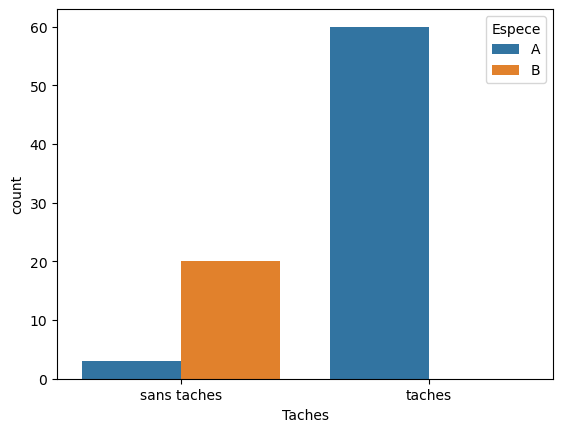

In [152]:
sns.countplot(bears, x="Taches", hue="Espece")

<Axes: xlabel='Couleur', ylabel='count'>

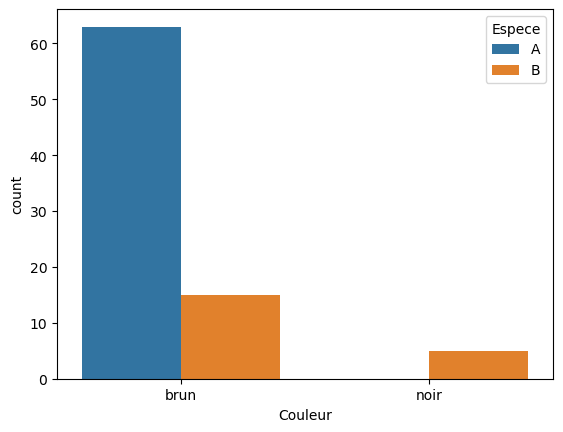

In [153]:
sns.countplot(bears, x="Couleur", hue="Espece")

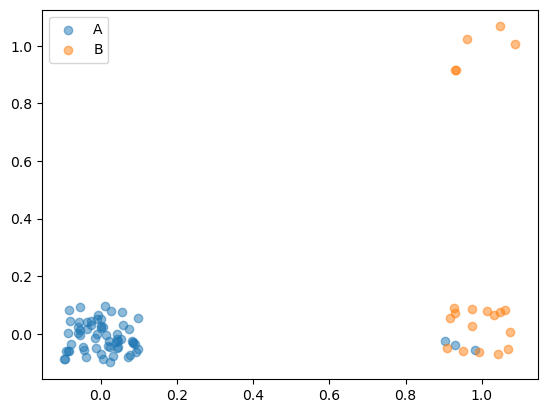

In [195]:
taches = pd.factorize(bears["Taches"])[0]
couleur = pd.factorize(bears["Couleur"])[0]
espece = pd.factorize(bears["Espece"])[0]

ta = taches[espece == 0]
tb = taches[espece == 1]

ca = couleur[espece == 0]
cb = couleur[espece == 1]

plt.scatter(
    ta + np.random.uniform(-0.1, 0.1, size=ta.shape), 
    ca + np.random.uniform(-0.1, 0.1, size=ca.shape), 
    color="C0",
    label="A",
    alpha=0.5,
)

plt.scatter(
    tb + np.random.uniform(-0.1, 0.1, size=tb.shape), 
    cb + np.random.uniform(-0.1, 0.1, size=cb.shape), 
    color="C1",
    label="B",
    alpha=0.5
)

plt.legend()

# 4. Rodents (supervised learning)

In [15]:
rodents = pd.read_csv("../data/rodents.csv")
rodents["Label"] = pd.factorize(rodents["Espece"])[0]
rodents.head()

,Espece,Taille,Poids,Label
0,A,36,17,0
1,A,41,16,0
2,A,48,18,0
3,A,47,18,0
4,A,50,22,0


In [157]:
objective = rodents["Label"].values
data = rodents[["Taille", "Poids"]].values

print("Data point: ", data)
print("Objective: ", objective)

Data point:  [[36 17]
 [41 16]
 [48 18]
 [47 18]
 [50 22]
 [48 21]
 [48 12]
 [56 16]
 [62 13]
 [64 22]
 [65 18]
 [66 21]]
Objective:  [0 0 0 0 0 0 1 1 1 1 1 1]


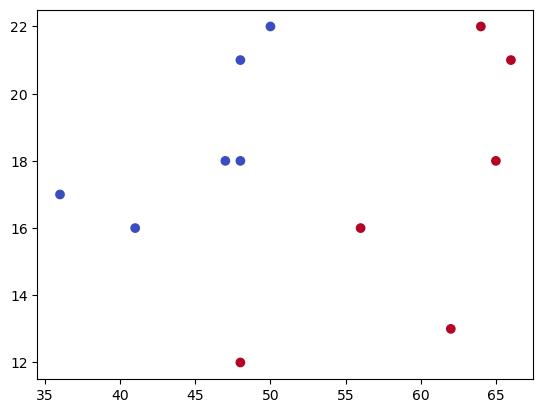

In [158]:
plt.scatter(data[:, 0], data[:, 1], c=objective, cmap="coolwarm")

In [159]:
def perceptron(w, b, x):
    # y = h(w . x + b)
    a = np.dot(w, x) + b
    a = np.where(a < 1, 1.0, 0.0)
    return a

In [188]:
# Initialize parameters
# w = [w1, w2], b
w = np.random.uniform(-10, 10, size=(1, 2))
b = np.random.uniform(-10, 10)

n_epochs = 50  # train 1000 times on whole dataset
lr = 0.0001 # learning rate (update rate of parameters)

all_errors = []
ws = []
bs = []
accuracys = []
for epoch in range(n_epochs):
    scores = []
    errors = []

    random_index = np.random.choice(np.arange(len(data)), replace=False, size=len(data))
    for i in random_index:  # for each data point and label
        x = data[i]
        target = objective[i]
        
        # estimate current error
        y = perceptron(w, b, x)
        error = target - y

        # update parameters based on error
        w = w - lr * error * x
        b = b - lr * error * 1
        
        errors.append(error)
        score = 1 - np.abs(error)
        scores.append(score)

    ws.append(w)
    bs.append(b)

    all_errors.append(np.mean(errors))
    accuracys.append(np.mean(scores))

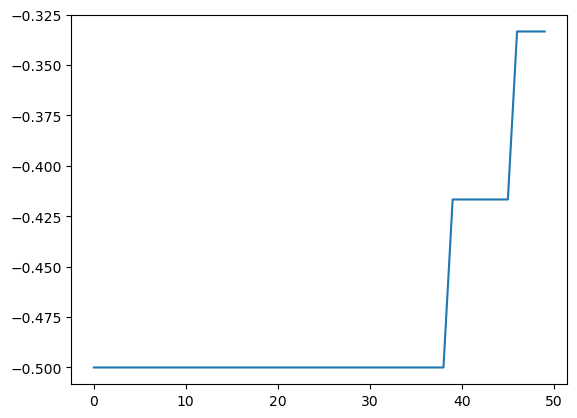

In [189]:
plt.plot(range(len(all_errors)), all_errors)

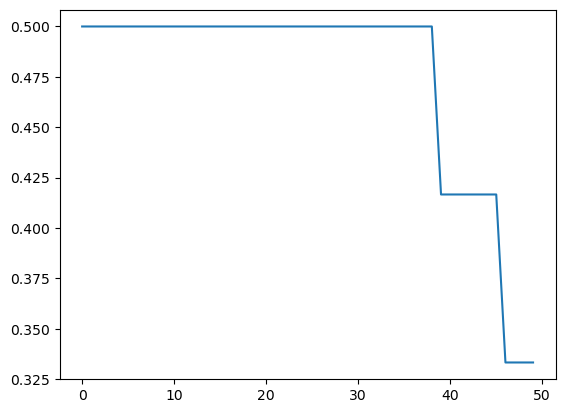

In [190]:
plt.plot(accuracys)

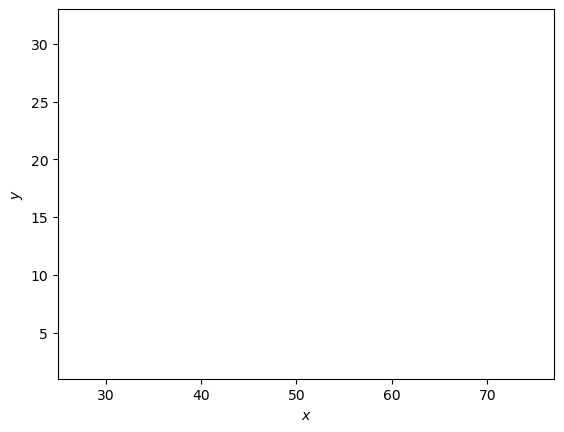

In [192]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from functools import partial
from IPython.display import HTML
from celluloid import Camera

fig = plt.figure()
camera = Camera(fig)

min_x, max_x = data[:, 0].min() - 10, data[:, 0].max() + 10
min_y, max_y = data[:, 1].min() - 10, data[:, 1].max() + 10

xx, yy = np.meshgrid(np.linspace(min_x, max_x, 50), np.linspace(min_y, max_y, 50)[::-1])
xx = np.c_[xx.ravel(), yy.ravel()]

ax = fig.add_subplot()
ax.set_xlim(min_x - 1, max_x + 1)
ax.set_ylim(min_y - 1, max_y + 1)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")

for w, b in zip(ws, bs):
    ax.scatter(data[:, 0], data[:, 1], c=objective, cmap="coolwarm")
    a = perceptron(w, b, xx.T)
    ax.imshow(a.reshape(50, 50), alpha=0.5, interpolation="none", origin="lower", extent=(min_x, max_x, max_y, min_y), aspect="auto", cmap="coolwarm_r")
    camera.snap()

HTML(camera.animate().to_jshtml())